# Conv2D 모델링 예제


먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [20]:
!pip install python-mnist

In [7]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [8]:
mnist = tf.keras.datasets.mnist # 손글씨 데이터셋
# image size 28 x 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 정규화 해주게 됩니다.

In [9]:
print(x_train.shape)
print(x_test)

(60000, 28, 28)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

In [10]:
# conv2D layer 사용시, 원본 데이터에 가중치를 연산하기 위해서 원본데이터 형식이 W H C 가 되어야한다.
print(x_test)
x_test = x_test.reshape([-1, 28, 28, 1])#TODO, #TODO, #TODO]) # W H C -> Conv2D 용 shape
x_train = x_train.reshape([-1, 28, 28, 1]) #TODO, #TODO, #TODO])
x_train.shape

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


(60000, 28, 28, 1)

In [11]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)#(#TODO, #TODO)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(batch_size)#(#TODO, #TODO)).batch(batch_size)
print(train_ds)
#ImageDataGenerator와 유사함.

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>


층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [36]:
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
# model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, activation=None, padding='same', input_shape=(28, 28, 1)))#tf.keras.layers.Input(shape=(28, 28, 1)))#TODO)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, activation=None, padding='same'))#tf.keras.layers.Input(shape=(28, 28, 1)))#TODO)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# x=tf.keras.layers.Flatten()(x)
# x= tf.keras.layers.Dense(256, activation=None)(x)
# tf.keras.layers.Conv2D(...)
# import 에 layers 추가시
# layers.Conv2D(...)
# input_Layer = tf.keras.layers.Input(shape=(128,128,3))
# x=tf.keras.layers.Conv2D(32,(3,3),strides=1, activation=None)(input_Layer)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# x=tf.keras.layers.MaxPool2D((2,2))(x)
# x=tf.keras.layers.Conv2D(64,(3,3),strides=1,activation=None)(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# x=tf.keras.layers.MaxPool2D((2,2))(x)
# x=tf.keras.layers.Conv2D(128,(3,3),strides=1,activation=None)(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# x=tf.keras.layers.Conv2D(64,(3,3),strides=1,activation=None)(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# x=tf.keras.layers.MaxPool2D((2,2))(x)
# x=tf.keras.layers.Flatten()(x)
# x= tf.keras.layers.Dense(256, activation=None)(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# x= tf.keras.layers.Dropout(rate=0.4)(x)
# x= tf.keras.layers.Dense(512, activation=None)(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Activation(activation='relu')(x)
# Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)       

In [37]:
# from_logits=False는 loss function을 output layer에 추가했을 경우, True면 output layer에 추가하지 않았을 경우 -> softmax를 추가한다.
# SparseCategoricalCrossentropy는 label이 one hot vector가 아닌 경우.. label이 one hot이면 CategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), # Learning rate
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

모델을 훈련하고 평가합니다:

In [39]:
# using `tf.data.Dataset` #train_data, train_labels
# validation_split=0.1 
history = model.fit(train_ds,# y_train,
                    steps_per_epoch=len(x_train)//batch_size,#,
                    epochs=10,
                    #validation_split=0.2)
                    validation_data=test_ds,
                    validation_steps=len(x_test) // batch_size, # 1에폭에 대한 계산이 상대적입니다.
                    )

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1328 - accuracy: 0.9591 - val_loss: 0.0919 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0498 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0376 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0464 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0416 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0344 - val_ac

In [43]:
for t, l in train_ds.take(1):
    print(t.shape)
    print(type(t.shape))
    print(l.shape)

(32, 28, 28, 1)
<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(32,)


In [29]:
model.evaluate(x_test, y_test)[1]#)

313/313 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9887


0.9886999726295471

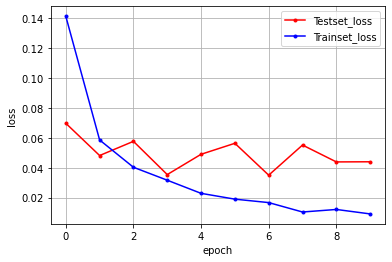

In [32]:
#테스트 셋의 오차
import matplotlib.pyplot as plt
import numpy as np
import os
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()